In [4]:
import numpy as np
import matplotlib.pyplot as plt
import string
import importlib
#import lasagne as nn

import utils

In [8]:
#topX = 5
metadata_path = "metadata/dump_pureConv-20180804-010835-47.pkl"
#metadata_path = "metadata/dump_stackedcomp-20180514-163759-42.pkl"
#metadata_path = "metadata/dump_compbiomod-20180512-201015-43.pkl"

print "Loading metadata file %s" % metadata_path
metadata = np.load(metadata_path)
print metadata['config_name']
#config = importlib.import_module("configurations.%s" % metadata['config_name'])

Loading metadata file metadata/dump_pureConv-20180804-010835-47.pkl
pureConv


In [5]:
acc_eval_valid = metadata['accuracy_eval_valid']
acc_train = metadata['accuracy_train']

# Running through top X best and making an averaged top X validations
best_val = np.zeros(shape=topX, dtype='float32')
max_val = np.zeros(shape=topX, dtype=int)
print
print "Max valids found at"
for i in range(topX):
    max_val[i] = np.argmax(acc_eval_valid)
    best_val[i] = acc_eval_valid[max_val[i]]
    acc_eval_valid[max_val[i]] = 0.0 # To make it take the next max value
    print max_val[i]

print "Valid acc"
i = 1
for valid, train in zip(acc_eval_valid, acc_train):
    print "%d: %.5f %.5f" %(i, train, valid)
    i = i+1
    
print "Best Validation = %.5f" % best_val[0]
print "Averaged on top %d" % topX
print "Validation = %.5f" % best_val.mean()


Max valids found at
26
28
33
37
29
Valid acc
1: 0.57685 0.62356
2: 0.62912 0.60057
3: 0.62623 0.63450
4: 0.63544 0.63433
5: 0.64501 0.64015
6: 0.64916 0.65822
7: 0.65289 0.65183
8: 0.65362 0.66700
9: 0.65893 0.63662
10: 0.65975 0.66861
11: 0.66134 0.66488
12: 0.66382 0.61492
13: 0.66523 0.66240
14: 0.66528 0.62640
15: 0.66645 0.67532
16: 0.66731 0.65809
17: 0.66884 0.61847
18: 0.66784 0.67450
19: 0.67061 0.63293
20: 0.67030 0.64152
21: 0.67038 0.66748
22: 0.67161 0.67351
23: 0.67244 0.66176
24: 0.67294 0.65385
25: 0.67297 0.60184
26: 0.67281 0.66786
27: 0.67338 0.00000
28: 0.67412 0.67528
29: 0.67467 0.00000
30: 0.67452 0.00000
31: 0.67541 0.60932
32: 0.67512 0.66902
33: 0.67584 0.63559
34: 0.67530 0.00000
35: 0.67639 0.67291
36: 0.67566 0.67323
37: 0.67746 0.63254
38: 0.67633 0.00000
39: 0.67632 0.66891
40: 0.67702 0.66900
41: 0.67697 0.66812
42: 0.67648 0.66584
43: 0.67732 0.67347
44: 0.67764 0.66750
Best
Validation = 0.68252
Averaged on top 5
Validation = 0.67990


# Parameter analysis

In [14]:
par[-2].size

1600

In [18]:
params = np.array(metadata['param_values'])

print "Params shape:", params.shape
for i, layer_params in enumerate(params):
    print "--Layer {:2d}: size {:4d}, shape {:s}, ".format(i, layer_params.size, layer_params.shape)

Params shape: (52,)
--Layer  0: size 2016, shape (16, 42, 3), 
--Layer  1: size   16, shape (16,), 
--Layer  2: size   16, shape (16,), 
--Layer  3: size   16, shape (16,), 
--Layer  4: size   16, shape (16,), 
--Layer  5: size 3360, shape (16, 42, 5), 
--Layer  6: size   16, shape (16,), 
--Layer  7: size   16, shape (16,), 
--Layer  8: size   16, shape (16,), 
--Layer  9: size   16, shape (16,), 
--Layer 10: size 4704, shape (16, 42, 7), 
--Layer 11: size   16, shape (16,), 
--Layer 12: size   16, shape (16,), 
--Layer 13: size   16, shape (16,), 
--Layer 14: size   16, shape (16,), 
--Layer 15: size 4320, shape (16, 90, 3), 
--Layer 16: size   16, shape (16,), 
--Layer 17: size   16, shape (16,), 
--Layer 18: size   16, shape (16,), 
--Layer 19: size   16, shape (16,), 
--Layer 20: size 7200, shape (16, 90, 5), 
--Layer 21: size   16, shape (16,), 
--Layer 22: size   16, shape (16,), 
--Layer 23: size   16, shape (16,), 
--Layer 24: size   16, shape (16,), 
--Layer 25: size 10080, s

In [34]:
print("Building network ...")
##########################DEBUG##########################
l_in, l_out = config.build_model()
    
##########################DEBUG##########################
all_layers = nn.layers.get_all_layers(l_out)
num_params = nn.layers.count_params(l_out)
print("  number of parameters: %d" % num_params)
print("  layer output shapes:")
for layer in all_layers:
    name = string.ljust(layer.__class__.__name__, 32)
    print("    %s %s %s" % (name, nn.layers.get_output_shape(layer), nn.layers.count_params(layer)))

Building network ...
  number of parameters: 23976
  layer output shapes:
    InputLayer                       (None, 700, 42) 0
    DimshuffleLayer                  (None, 42, 700) 0
    Conv1DLayer                      (None, 50, 700) 23100
    BatchNormLayer                   (None, 50, 700) 23300
    NonlinearityLayer                (None, 50, 700) 23300
    DimshuffleLayer                  (None, 700, 50) 23300
    ReshapeLayer                     (44800, 50) 23300
    DenseLayer                       (44800, 8) 23708
    ReshapeLayer                     (64, 700, 8) 23708
    DimshuffleLayer                  (64, 8, 700) 23708
    Conv1DLayer                      (64, 5, 700) 23908
    BatchNormLayer                   (64, 5, 700) 23928
    NonlinearityLayer                (64, 5, 700) 23928
    DimshuffleLayer                  (64, 700, 5) 23928
    ReshapeLayer                     (44800, 5) 23928
    DenseLayer                       (44800, 8) 23976
    ReshapeLayer           

(42, 11)


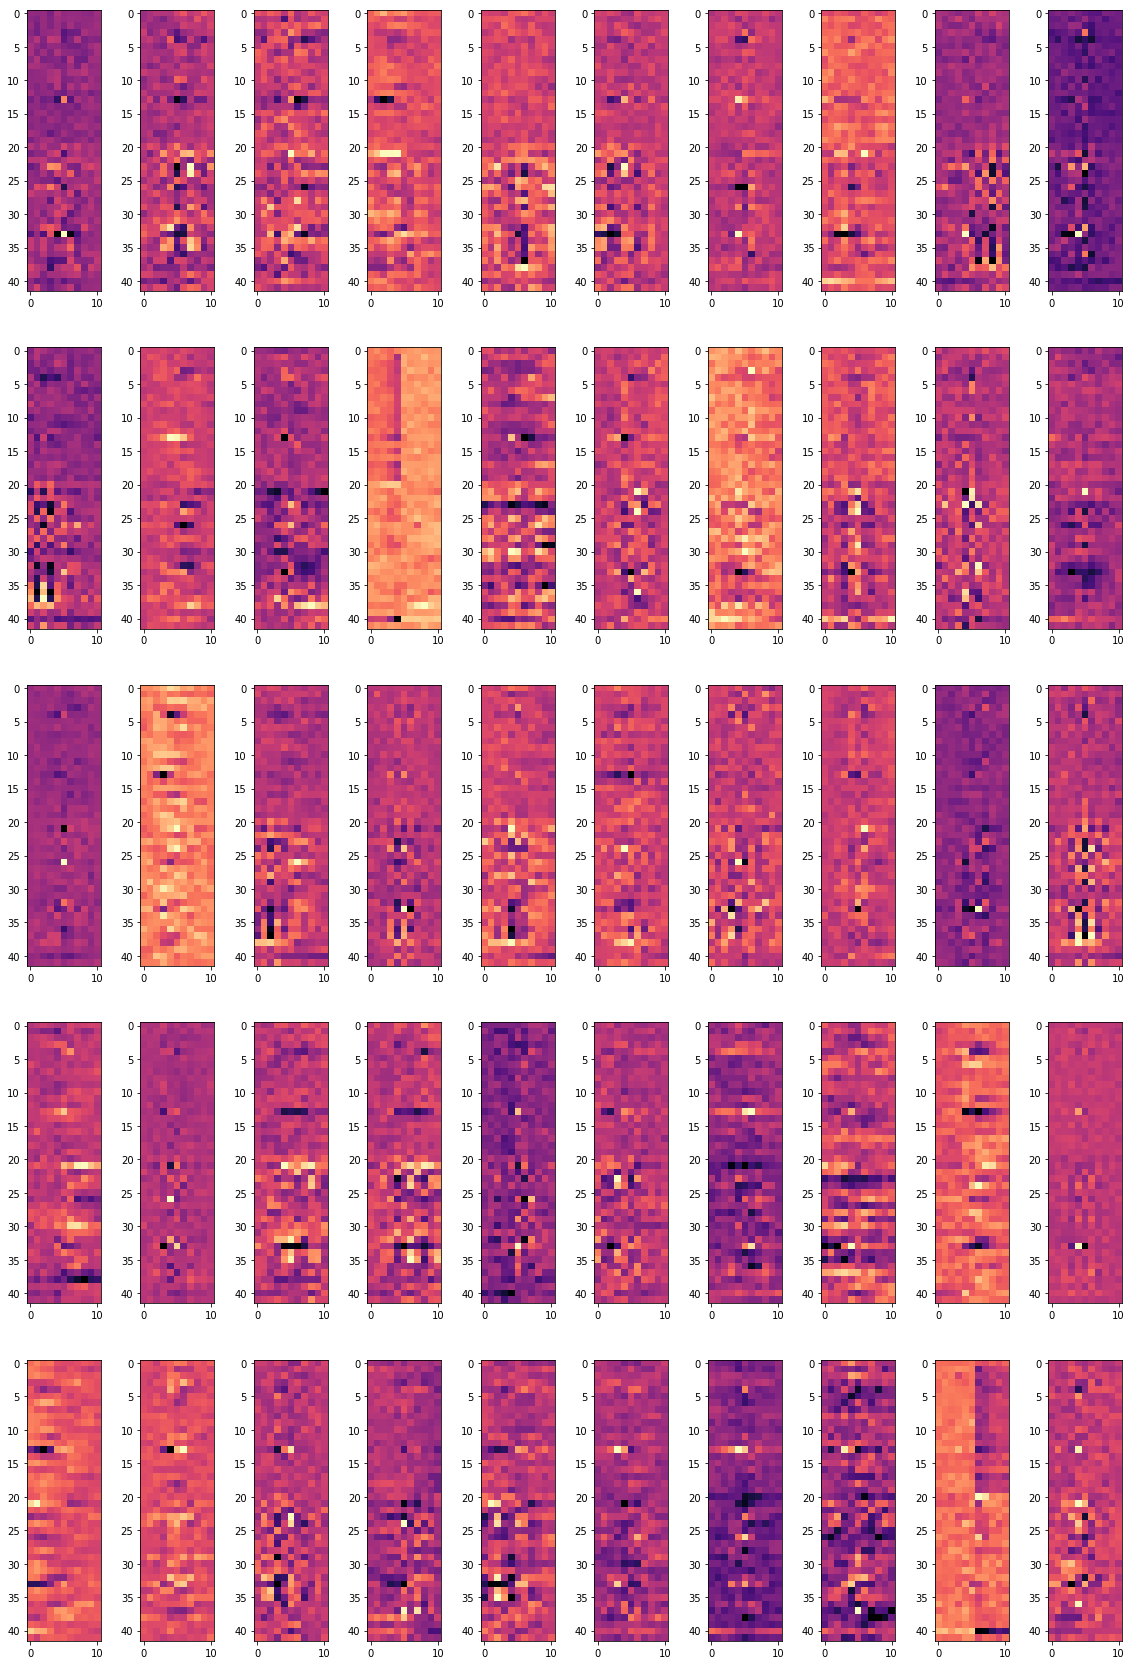

In [74]:
print par[0][0].shape
n_per_col = 10
fig3,ax3 = plt.subplots(50/n_per_col,n_per_col,figsize=((20, 30)))
#fig3,ax3 = plt.subplots(50,figsize=((20, 200)))
for i in range(50):
    #print "%s %s" % (i/10, i%10)
    #ax3[i].imshow(par[0][i].T, cmap='magma')
    ax3[i/n_per_col,i%n_per_col].imshow(par[0][i], cmap='magma')
    #fig3.colorbar(cax)
fig3

(50, 8)


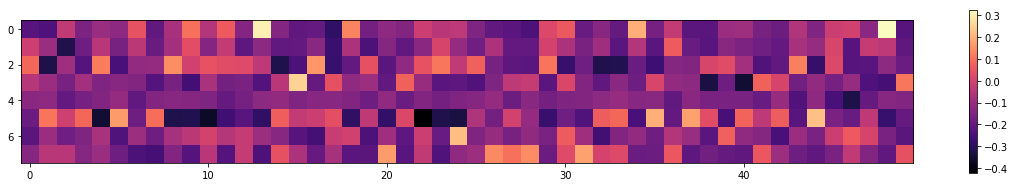

In [70]:
print par[5].shape
fig2,ax2 = plt.subplots(figsize=((20,3)))
ax2.imshow(par[5].T, cmap='magma')
fig2.colorbar(cax)
fig2

In [72]:
print par[6]

[ 0.36177403 -0.81548015 -0.01037454 -0.20094047 -2.5502052  -0.01193167
 -0.28458894 -0.10731842]


In [31]:
fil = par[0][0]
for i in range(fil.shape[1]):
    print fil[:21,i]

[-0.03954746 -0.05909055 -0.02969708 -0.06250041 -0.03399441 -0.00019457
  0.00320151 -0.05396647  0.00684729 -0.05373909 -0.0459629  -0.04757319
 -0.00567464 -0.10185487 -0.05042955 -0.08081506 -0.05143139 -0.06966353
 -0.000869   -0.08865835  0.02747137]
[-0.05496881 -0.0793311  -0.10235795 -0.10633794  0.02952294 -0.04816846
 -0.07602153  0.01784675  0.00341018 -0.03981867 -0.04097059 -0.07163879
 -0.06600026 -0.04371018 -0.04650383 -0.02519005 -0.04066886 -0.04478766
 -0.02282374 -0.04408316 -0.02738545]
[-0.03820761 -0.03114034 -0.02852636 -0.04509321 -0.07858309 -0.09062555
 -0.01325849 -0.0889061  -0.0205194  -0.03273934 -0.0431739  -0.04002212
 -0.04958994 -0.11629503 -0.07691486 -0.01224512 -0.07959052 -0.05352432
 -0.05812383 -0.00360302  0.03620426]
[-0.09315172 -0.0796509  -0.07750869 -0.02855733  0.06216069 -0.03609172
 -0.08547404 -0.08040925 -0.04193796  0.00104603  0.01069805 -0.08203572
 -0.04538694 -0.09700026 -0.04349133 -0.06912067 -0.007678   -0.05467427
 -0.138575

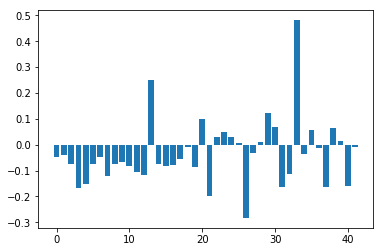

In [30]:
fil = par[0][0]
fig,ax = plt.subplots()
ax.bar(range(len(fil[:,0])),fil[:,5])
fig

(8, 5)


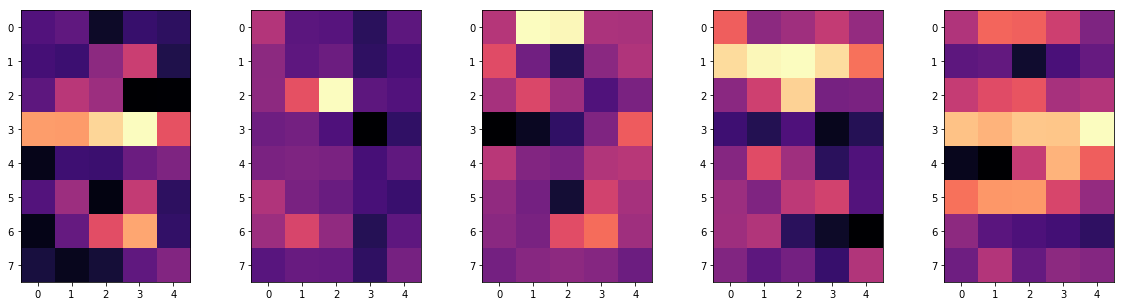

In [43]:
print par[7][0].shape
n_per_col = 10
#fig3,ax3 = plt.subplots(50/n_per_col,n_per_col,figsize=((20, 30)))
fig,ax = plt.subplots(1,5,figsize=((20, 5)))
for i in range(5):
    #print "%s %s" % (i/10, i%10)
    cax = ax[i].imshow(par[7][i], cmap='magma')
    #ax3[i/n_per_col,i%n_per_col].imshow(par[0][i], cmap='magma')
#fig.colorbar(cax)
fig

In [45]:
print par[-2]

[[-0.29933889 -0.68227946  0.01382332  0.67042088 -0.11276766  1.05896167
  -0.92446062  0.02794185]
 [ 0.87935166  0.23797863 -0.49319253  0.29462845 -0.62565304 -0.01508447
   0.19502671 -0.25364191]
 [-0.11602521 -0.45749417 -0.29626542  0.08972316 -0.48431458 -0.60793518
   0.22090474  0.8144801 ]
 [ 0.41285855  0.14796185  1.13115998 -0.74621005 -0.53774547 -0.7432928
   0.05613496 -0.48851111]
 [ 0.09757703 -0.34107335 -0.16552268 -0.74394268 -0.13224853  0.79766453
   0.50380576  0.35608217]]


# Prediction analysis

In [2]:
import data
x, mask, y_label, z = data.get_test()
mask = mask.astype(int)

Loading test data ...


### Basic model

In [3]:
predictions_path = "predictions/predictions_compbiomod-20180512-201015-43.npy"
predictions_label = np.argmax(np.load(predictions_path), axis=2)
print predictions_label.shape

(640, 700)


### Stacked model

In [3]:
predictions_path = "predictions/predictions_stackedcomp-20180514-163759-42.npy"
predictions_label2 = np.argmax(np.load(predictions_path), axis=2)
print predictions_label2.shape

(640, 700)


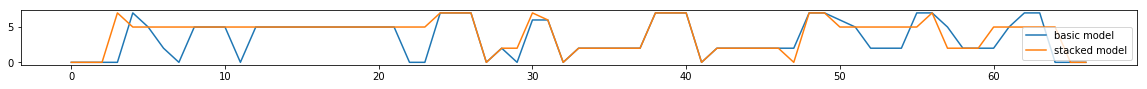

In [120]:
#predictions_label[predictions_label == 1].shape
seq = 0
ext = 410
#print predictions_label[0,:ext]
#print y_label[0,:ext]
fig,ax = plt.subplots(figsize=((20,1)))
ax.plot(predictions_label[seq,mask[seq] == 1], label="basic model")
ax.plot(predictions_label2[seq,mask[seq] == 1], label="stacked model")
#ax.plot(y_label[seq,mask[seq] == 1], label="targets")
ax.legend(loc="lower right")
fig

In [5]:
predictions = utils.one_hot(predictions_label2[mask == 1], 8)
y = utils.one_hot(y_label[mask == 1], 8)

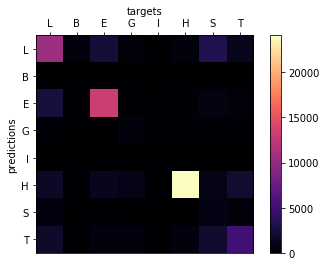

In [28]:
#new_p = np.reshape(predictions, (640*700, 8)).T
#new_y = np.reshape(y, (640*700, 8))
plt.clf()
fig2,ax2 = plt.subplots()#figsize=((20,3)))
cax = ax2.imshow(np.dot(predictions.T, y), cmap='magma')
ax2.set(xlabel="targets", ylabel="predictions")
ax2.xaxis.set(ticks=range(8), ticklabels=['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T'], ticks_position="top", label_position="top")
ax2.yaxis.set(ticklabels=['A','L', 'B', 'E', 'G', 'I', 'H', 'S', 'T'])
#cax = ax2.imshow(np.log(np.dot(predictions.T, y)), cmap='magma')
#cax = ax2.imshow(np.log(np.dot(new_p, new_y)), cmap='magma')
fig2.colorbar(cax)
fig2

In [22]:
y.shape

(84765, 8)